# Titanic dataset analysis:

I have choosed the titanic data set for analysis , Following are the question i would like to answer in provided dataset.
1. Is there any relation between the sex of the passenger who is travelling and the chances of his or her survival(does any sympathy shown towards the particular sex).
2. Does we have any relationship between the age of the person and chances of his/her survival(does any sympathy shows toward the childern and older people)
3. Is there any relation between the class of passenger travelling and chances of his or her survival(does any preference given on the basis of class)

Loading the Titanic dataset CSV file.

In [20]:
import pandas as pd
titanicDataset=pd.read_csv("titanic-data.csv")
titanicDataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Question 1:

Is there any relation between the sex of the passenger who is travelling and the chances of his or her survival(does any sympathy shown towards the particular sex).

lets start with segregating the survived passenger data from the given dataset

In [21]:
titanicDatasetQ1=titanicDataset[['Survived']]

In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
survivalList=titanicDatasetQ1['Survived']==1
survivalPeople=titanicDataset[survivalList]

Total number of males and females were present in dataset.

In [135]:
titanicDataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Now survival dataset is ready , we go ahead and find out how many males or females were survived.

In [133]:
groupedBySex=survivalPeople['Sex'].value_counts()
groupedBySex

female    233
male      109
Name: Sex, dtype: int64

Now plotting the survived males and females in bar chart

[<matplotlib.text.Text at 0x1a86a780>, <matplotlib.text.Text at 0x177875f8>]

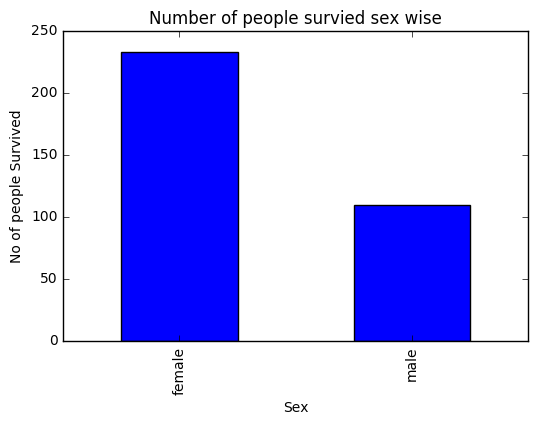

In [134]:
graph=groupedBySex.plot(kind='Bar',title='Number of people survied sex wise')
graph.set(xlabel='Sex',ylabel='No of people Survived')

###### From Bar chart it is very clear that most of the female were survived in titanic accident(233 out of 314)

# Question 2:

Does we have any relationship between the age of the person and chances of his/her survival(does any sympathy shows toward the childern and older people)

I want to start this analysis by finding the average age of people present in ship.

In [136]:
titanicDataset['Age'].mean()

29.69911764705882

Now i want to find the average age of survived people.

In [138]:
survivalPeople['Age'].mean()

28.343689655172415

I want find out the age group of the people who were survived . I am using histogram plot for showing the same.

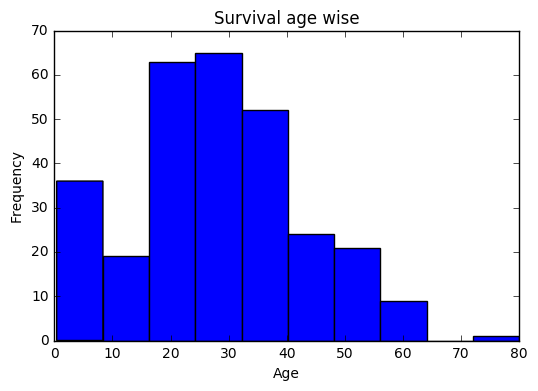

In [139]:
survivalAge=survivalPeople['Age'].plot(kind='hist',title='Survival age wise')
survivalAge.set(xlabel='Age')

This graph clearly shows that most of the people who survived were quite young between 20-40

Now I want to check age of the people who were not able to survived.

In [140]:
nonSurvivalList=titanicDatasetQ1['Survived']==0
nonSurvivalPeople=titanicDataset[nonSurvivalList]

Average age of the people who were not able to survive.

In [71]:
nonSurvivalPeople['Age'].mean()

30.626179245283019

Average age of survived people and non survied people looks same approximately.For more clarity we can have a look on the histogram for both survived(shown with green color) and non survived (shown with red color)

[]

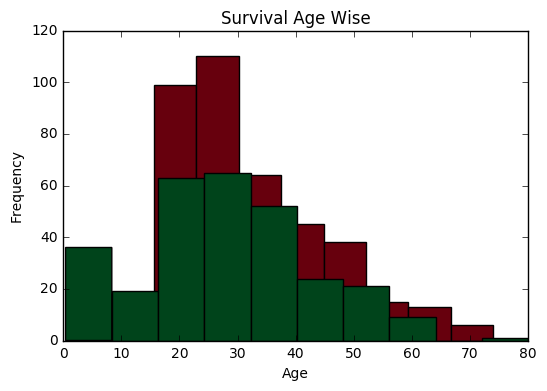

In [80]:
nonSurvivalPeople['Age'].plot(kind='hist',colormap='Reds_r',title='Survival Age Wise')
survivalAge=survivalPeople['Age'].plot(kind='hist',colormap='Greens_r')
survivalAge.set(xlabel='Age')
plt.plot()


Total number of old passenger in the ship.

In [157]:
titanicDataset[titanicDataset['Age']>60]['PassengerId'].count()

22

Number of old passenger who survived.

In [158]:
survivalPeople[survivalPeople['Age']>60]['PassengerId'].count()

5

Number of passenger who were not able to survive.

In [160]:
nonSurvivalPeople[nonSurvivalPeople['Age']>60]['PassengerId'].count()

17

###### This graph clearly shows there is no relation between age of person and his survival.Since in both case survival and non survival following are the stats:
1. mean age of survival group is 28.343689655172415
2. mean age of non survival group is 30.626179245283019

It is also very visible that no special sympathy shown towards the old people , as the chart show only 5 old people(age > 60) were saved out of 22 people.

# Question 3:

Is there any relation between the class of passenger travelling and chances of his or her survival(does any preference given on the basis of class)

I start my analysis with the number of people travelling in each class

In [149]:
titanicDataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Now i want to check the number of people who survived in each class.

In [150]:
survivalPeople['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

lets analyze survived people for a particular class through the bar chart.

[<matplotlib.text.Text at 0x1a836f28>, <matplotlib.text.Text at 0x19523b38>]

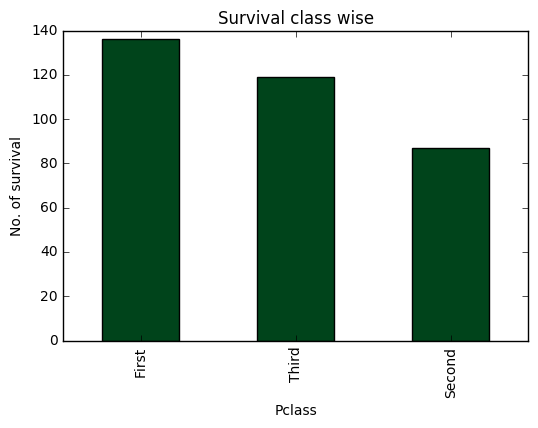

In [151]:
newSurvivalPeople=survivalPeople['Pclass'].replace([1,3,2],['First','Third','Second'])
classChart=newSurvivalPeople.value_counts().plot(kind='bar',title='Survival class wise',colormap='Greens_r')
classChart.set(xlabel='Pclass',ylabel='No. of survival')

Analysis on the people who were not able to survived class wise

In [105]:
nonSurvivalPeople['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [108]:
titanicDataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

[<matplotlib.text.Text at 0x19c7e160>, <matplotlib.text.Text at 0x198bcf98>]

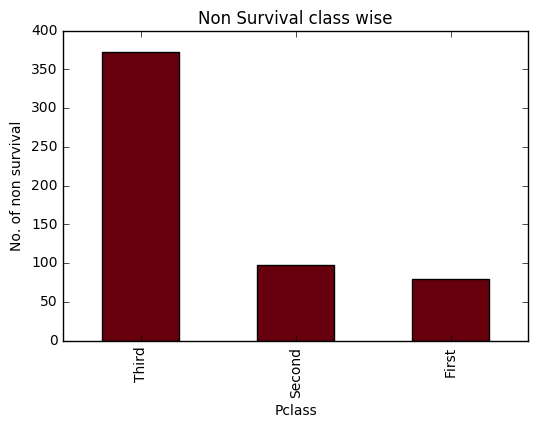

In [115]:
newnonSurvivalPeople=nonSurvivalPeople['Pclass'].replace([1,3,2],['First','Third','Second'])
nclassChart=newnonSurvivalPeople.value_counts().plot(kind='bar',title='Non Survival class wise',colormap='Reds_r')
nclassChart.set(xlabel='Pclass',ylabel='No. of non survival')

###### by looking on the both bar chart it is very evident that :
1. Most preference for life saving was given to the passenger who were travelling in 1st class.
2. Least preference was given to the passenger who were travelling through 3rd class.

# Miscellaneous Question:

##### Answering first 3 question raise an another question:

In analysis 1st and 3rd shows that there were some favour given while carrying out life saving activies.
1. 1st analysis shows that the favour was given on sex basis . More female were saved.
2. 3rd analysis shows that the favour was given for particular class. More first class traveller were saved.

Now i want to analysis is there any relation between the two analysis. following are the question which needs to be answered.
1. How many females were saved who were travelling through first class.
2. How many females were saved who were travelling in other than first class.

In [127]:
fSurvivalPeople=survivalPeople[survivalPeople['Sex']=='female']
newFsurvivalPeople=fSurvivalPeople['Pclass'].replace([1,3,2],['First','Third','Second'])
newFsurvivalPeople.value_counts()

First     91
Third     72
Second    70
Name: Pclass, dtype: int64

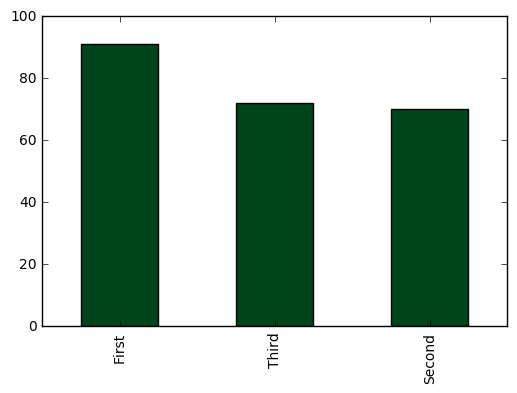

In [130]:
newFsurvivalPeople.value_counts().plot(kind='bar',colormap='Greens_r')

# Conclusion:

##### Above chart clearly showed that the preference was given to the females who were travelling through 1st class and least preference was given to the females travelling in third class.